In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
data = pd.read_csv('./hw-02/cluster_data1.csv')

In [231]:
data.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [232]:
data.tail()

,X1,X2,X3,X4
145,5.4,3.9,1.3,0.4
146,5.3,3.7,1.5,0.2
147,6.1,2.6,5.6,1.4
148,5.7,3.8,1.7,0.3
149,5.4,3.4,1.7,0.2


1. Implanting K-means clustering algorithm

In [233]:
#implement K-means clustering algorithm from scratch.
X = data[['X1', 'X2']].values
np.random.seed(123) #Put random seed as ‘123’.

In [234]:
k = 3 #Let’s assume K=3
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

In [235]:
# Assign clusters
def assign_clusters(X, centroids):
  # Calculate distances between data points and centroids using Euclidean distance
  distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
  return np.argmin(distances, axis=0)

In [236]:
# Update centroids
def update_centroids(X, labels, k):
  return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [237]:
# Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to distinguish each cluster and its centroid for the first 5 steps
def plot_clusters(X, centroids, labels, iteration, final_iteration=False, initial_iteration=False):
  plt.figure(figsize=(8, 6))
  for i in range(k):
      plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
  plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
  for centroid in centroids:
      plt.axhline(y=centroid[1], color='lightgray', linestyle='--', linewidth=1)
      plt.axvline(x=centroid[0], color='lightgray', linestyle='--', linewidth=1)

  if final_iteration:
    plt.title(f'Iteration {iteration} (Final)')
  else:
    plt.title(f'Iteration {iteration}')
  plt.xlabel('X1') #In your plot, set x-axis as ‘X1’
  plt.ylabel('X2') #y-axis as ‘X2’
  plt.legend()
  plt.grid(True)
  plt.show()


In [238]:
def kmeans(X, k, centroids, max_iter=100):
  for i in range(max_iter):
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, labels, k)
    if np.all(centroids == new_centroids):
      print(f'Converged after {i} iterations')
      break
    centroids = new_centroids

  return labels, centroids, i

Iteration 0, Centroids: [[5.61884058 3.1       ]
 [4.77666667 3.01      ]
 [6.7745098  3.01764706]]


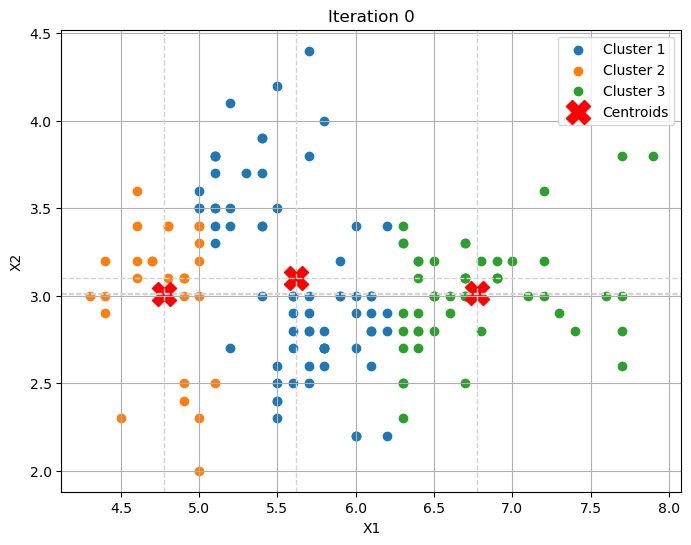

Iteration 1, Centroids: [[5.70555556 3.03518519]
 [4.86428571 3.15238095]
 [6.74259259 2.9962963 ]]


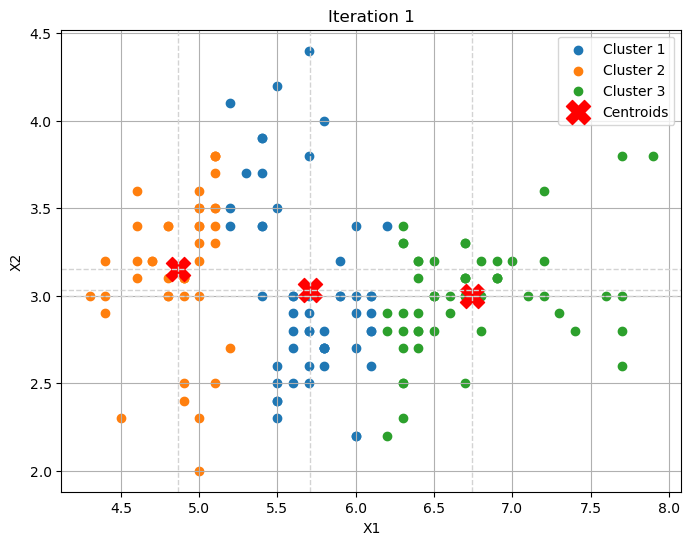

Iteration 2, Centroids: [[5.76153846 2.97884615]
 [4.89565217 3.19782609]
 [6.76346154 3.00192308]]


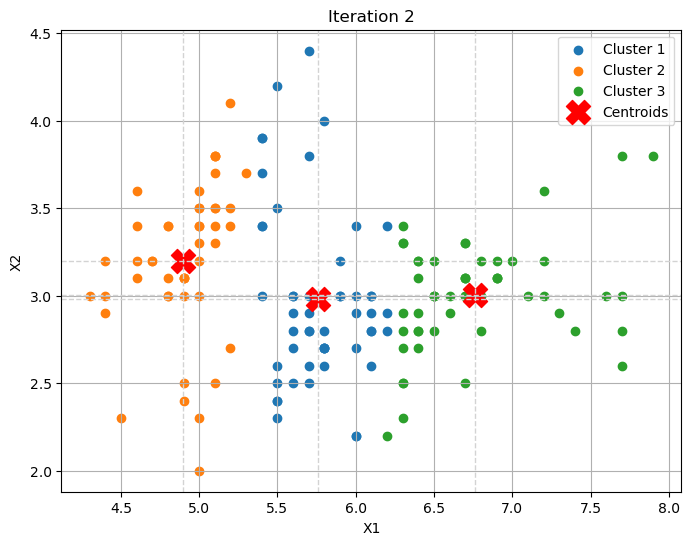

Iteration 3, Centroids: [[5.81489362 2.86382979]
 [4.95576923 3.26153846]
 [6.7745098  3.01764706]]


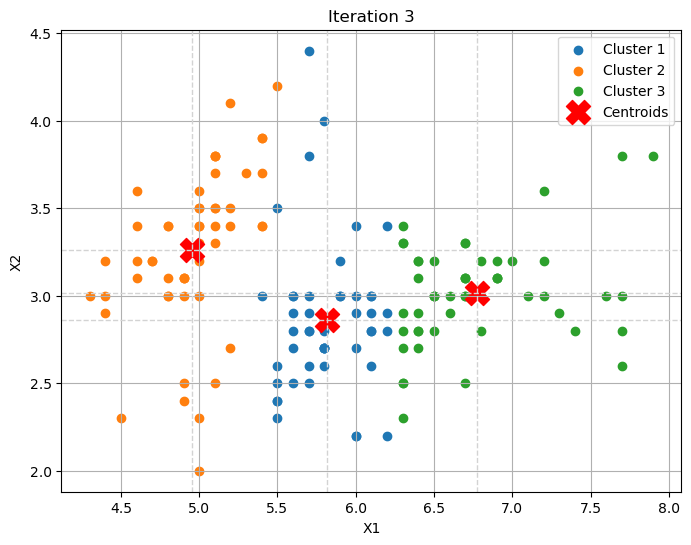

Iteration 4, Centroids: [[5.868      2.732     ]
 [5.00727273 3.33272727]
 [6.83777778 3.07111111]]


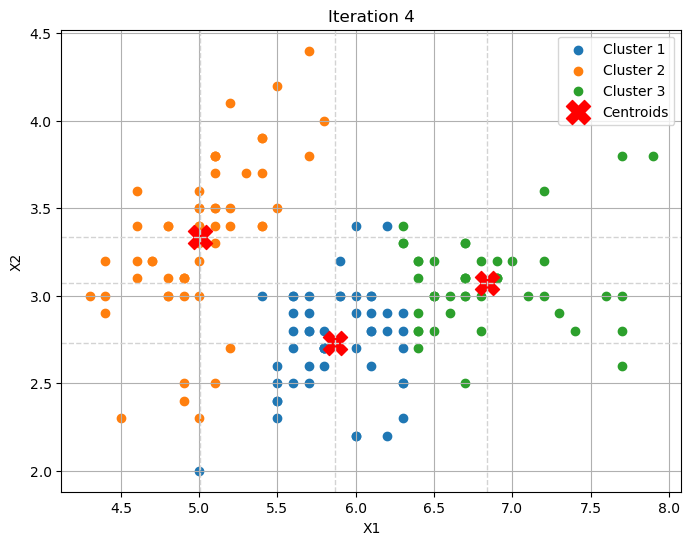

Converged after 5 iterations
Final centroids: [[5.8        2.7       ]
 [5.00392157 3.4       ]
 [6.82391304 3.07826087]]


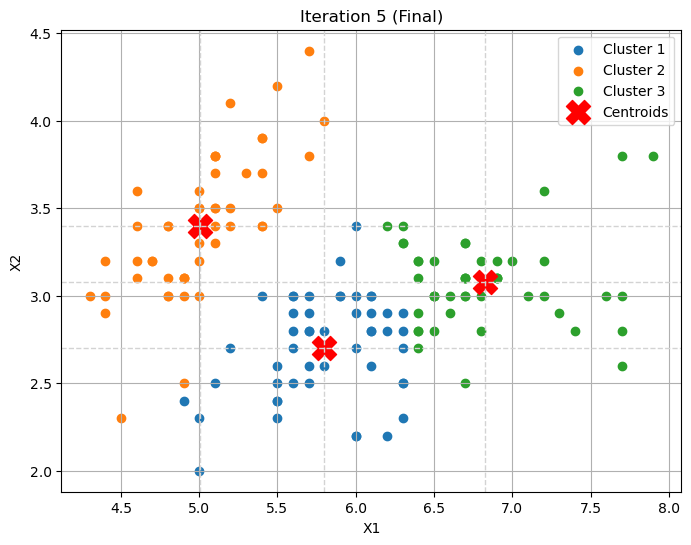

In [239]:
# centroids = X[np.random.choice(X.shape[0], k, replace=False)]
# labels, new_centroids, iteration = kmeans(X, k, centroids, max_iter=1)
# print(f'Initial centroids: {centroids}')
# plot_clusters(X, new_centroids, labels, 0, initial_iteration=True)

for i in range(5):
    labels, new_centroids, iteration = kmeans(X, k, centroids, max_iter=1)
    centroids = new_centroids
    print(f'Iteration {i}, Centroids: {centroids}')
    plot_clusters(X, centroids, labels, i)


labels, centroids, iteration = kmeans(X, k, centroids, max_iter=100)
print(f'Final centroids: {centroids}')
plot_clusters(X, centroids, labels, iteration, final_iteration=True)



Inference of the above plots :

The above plots show the stepwise cluster formations using K-means algorithm. The iteration 0 consits of centroids randomly initialised. In the first iteration we observe that the centroid is moving towards the denser reigon. The second iteration depicts the clusters are more distinct and centroids are aligned more closely. Iteration 3 seems to have less movement in the position of the centroid. The 4th and the final iteration seems to have minimal movement of centroid, where the centroid represents the mean position of the cluster.

2. (3 pts) Implanting K-means++ clustering algorithm and finding K

The steps to implement K-means++ clustering algorithm is as follows :

1. The first cluster is chosen uniformly at random from the data points.
but instead of randomly picking all the centroids, we just pick one centroid here.
2. Next, we compute the distance of each data point from the centroid.
3. Then, choose the next centroid from the data points with the longest distance from the previous centroids.
4. We then repeat steps 2 and 3 until k centroids have been chosen.

In [240]:
# Standardize all the columns in the dataframe using z-score method.
standardized_data = (data - data.mean()) / data.std()

In [241]:
X = standardized_data[['X1', 'X2','X3','X4']].values

In [242]:
np.random.seed(123)
k =3 #Number of clusters to consider


In [243]:
def kmeans_pp(X, k):
    centroids = []

    # Step 1: The first cluster is chosen uniformly at random from the data points.
    centroids.append(X[np.random.choice(X.shape[0])])

    for _ in range(1, k): # to repeat steps 2 and 3 until k centroids have been chosen.
        #Step 2. Next, we compute the distance of each data point from the centroid.
        distances = np.min(np.sqrt(((X - np.array(centroids)[:, np.newaxis]) ** 2).sum(axis=2)), axis=0)

        #Step 3. Then, choose the next centroid from the data points with the longest distance from the previous centroids.
        centroid_max = X[np.argmax(distances)]
        centroids.append(centroid_max)

    return np.array(centroids)



In [244]:
# Centroid is defined by calculating mean of the points in each cluster
def centroid_mean(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [245]:
# Function to plot using X1 and X2 of K++ iteration

def plot_clusters(X, centroids, labels, iteration):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'K-means++ Iteration {iteration+1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [246]:
# choosing centroid by using the 4 steps of the clustering algorithm
centroids = kmeans_pp(X, k)

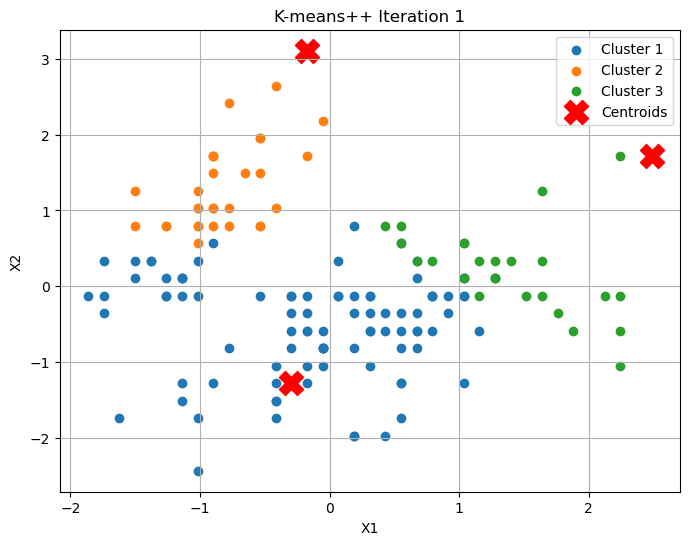

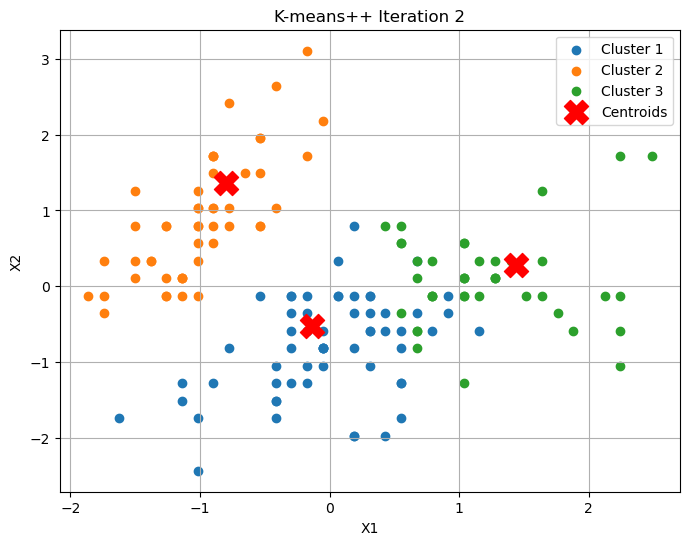

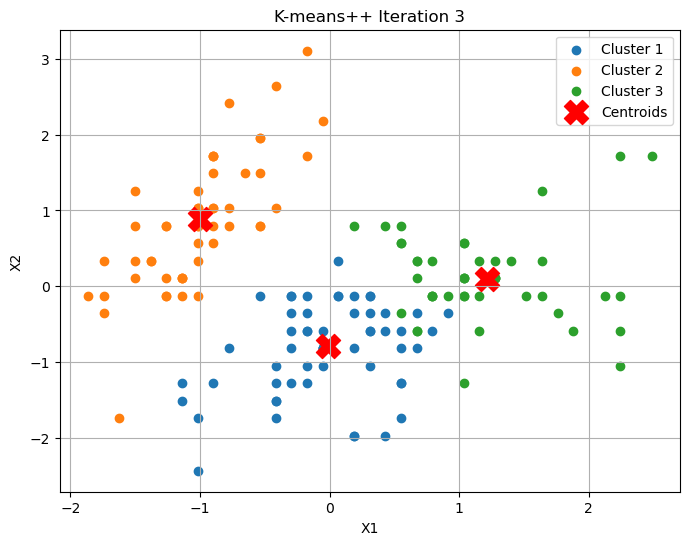

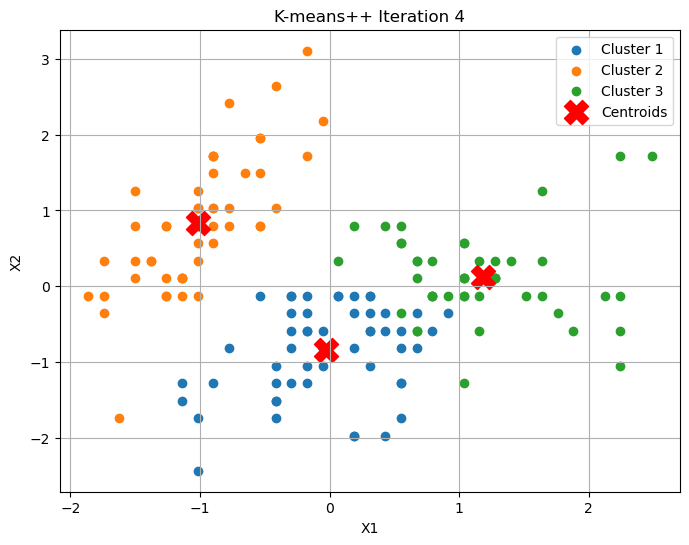

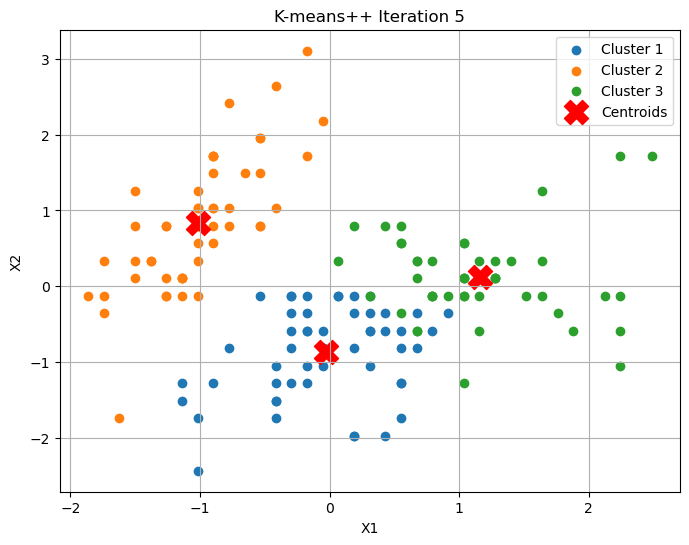

In [247]:
# Loop to display all five iterations
for i in range(5):
    labels = assign_clusters(X, centroids)
    plot_clusters(X, centroids, labels, i)
    centroids = update_centroids(X, labels, k)


Inference of the above plots :

Given that in the iteration 1 the centroid is chosen randomly, the other centroids in teh following iterations are calcualted based on longest distance from the selected centroids. In iteration2 the centroids are recalculated and points are assigned to their nearest centroid. In iteration 3 we observe, that the clusters are defined and there is difference only in few points. In iteration 4, the clusters seem to form completely. and centroids move a little compared to iteration 3. In the final iteration 5 the clusters are well defined and centroids are in the centre.

3. (4 pts) Implanting KNN classification

The steps to implemt KNN classification is as follows :

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

In [248]:
from collections import Counter

In [249]:
data2 = pd.read_csv('./hw-02/cluster_data2.csv')
data2_standardized = (data2 - data2.mean()) / data2.std()  # Standardize the new data

In [250]:
X_new = data2_standardized[['X1', 'X2']].values

In [251]:
X_train = X[:, :2]
y_train = labels

In [252]:
# Step-1: Select the number K of the neighbors

k = 3

In [253]:
# Step-2: Calculate the Euclidean distance of K number of neighbors
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [254]:
def knn_classify(X_train, labels_train, X_test_point, k):

    distances = [euclidean_distance(X_test_point, x_train)
                 for x_train in X_train]
    nearest_neighbors_calculated = np.argsort(distances)[:k]
    nearest_labels = [labels_train[i] for i in nearest_neighbors_calculated]

    # Manually count occurrences of each label
    label_count = {}
    for label in nearest_labels:
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1

    # Find the label with the maximum count
    max_count = -1
    most_common_label = None
    for label, count in label_count.items():
        if count > max_count:
            max_count = count
            most_common_label = label

    return most_common_label

In [255]:
predicted_labels = []
for x_new in X_new:
    label = knn_classify(X_train, y_train, x_new, k=3)  # Use k=3 as advised
    predicted_labels.append(label)

In [256]:
data2['Predicted_Class'] = predicted_labels

predicted_classes = data2['Predicted_Class'].values
print("Predicted classes for test data:", predicted_classes)

Predicted classes for test data: [1 1 0 0 0 0 1 2 1 2 0 2 1 2 2]


In [257]:
data2.head()

,X1,X2,X3,X4,Predicted_Class
0,5.21,3.65,1.42,0.25,1
1,5.07,3.41,1.43,0.19,1
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,0
4,6.55,2.90,5.54,2.05,0


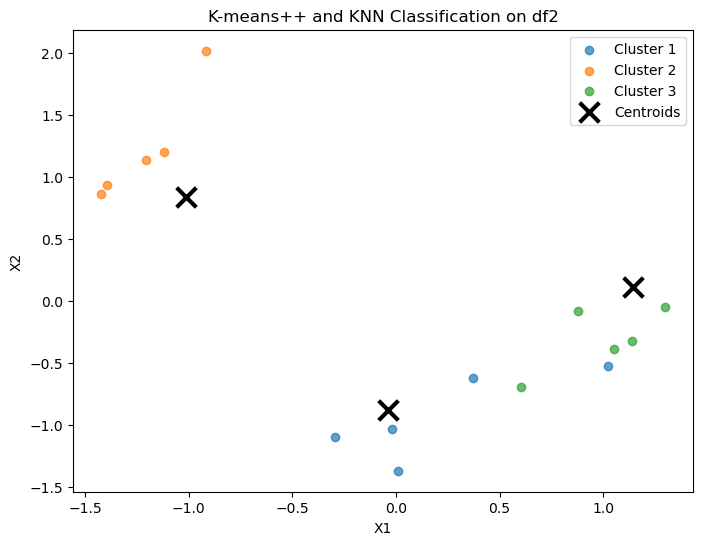

In [258]:
plt.figure(figsize=(8, 6))
for i in range(len(centroids)):
  plt.scatter(X_new[np.array(predicted_labels) == i, 0], X_new[np.array(predicted_labels) == i, 1], label=f'Cluster {i+1}', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means++ and KNN Classification on df2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Inference to the above plot : Each test data point to a cluster based on its nearest neighbour from trainig data